# NLP

## 相关设置

In [3]:
from IPython.core.interactiveshell import InteractiveShell
from utils.TF_IDF import tf_idf

import nltk
import pandas as pd
import numpy as np
import PIL.Image as image
import seaborn as sns
import matplotlib.pyplot as plt

from summa import keywords
from wordcloud import WordCloud
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


InteractiveShell.ast_node_interactivity = "all"  # 一个cell显示多输出

pd.set_option('display.max_rows', 100)  # 设置最大显示100行
pd.set_option('display.max_columns', 100)  # 设置最大显示100列

In [4]:
data = pd.read_csv("data/processed_data.csv")

In [5]:
data.head()
data.info()

,GlobalID,Detection Date,Notes,Lab Status,Lab Comments,Submission Date,Latitude,Longitude,FileName
0,{5AC8034E-5B46-4294-85F0-5B13117EBEFE},2019-12-08,"One dead wasp seen in Blaine, and suspect flyi...",Positive ID,,2020-01-15,48.980994,-122.688503,ATT1.png
1,{5EAD3364-2CA7-4A39-9A53-7F9DCF5D2041},2019-10-30,Hornet specimen sent to WSU,Positive ID,,2020-01-15,48.971949,-122.700941,ATT2.png
2,{13B67BCB-AFCE-4100-AD2B-76EF178BA228},2020-01-15,"Massive loss of bees, decapitated. No hornet s...",Unverified,,2020-01-15,48.939200,-122.661300,ATT3.png
3,{124B9BFA-7F7B-4B8E-8A56-42E067F0F72E},2019-09-19,This was the colony that was found and destroy...,Positive ID,"Thanks for adding this, and the great pictures!",2020-02-04,49.149394,-123.943134,ATT7.png
4,{BBBA5BA0-CAFB-43D3-8F1D-FB2D9CF777E0},2019-08-31,I was cleaning my gutters when I heard a snapp...,Unverified,Thanks for this report. I can't verify it from...,2020-02-14,48.723779,-122.354431,ATT8.png


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GlobalID         4368 non-null   object 
 1   Detection Date   4368 non-null   object 
 2   Notes            4368 non-null   object 
 3   Lab Status       4368 non-null   object 
 4   Lab Comments     4366 non-null   object 
 5   Submission Date  4368 non-null   object 
 6   Latitude         4368 non-null   float64
 7   Longitude        4368 non-null   float64
 8   FileName         2111 non-null   object 
dtypes: float64(2), object(7)
memory usage: 307.2+ KB


## 选取 positive 样本

In [48]:
positive_data = data[data['Lab Status'] == 'Positive ID']
positive_data.head(15)
positive_data.info()

,GlobalID,Detection Date,Notes,Lab Status,Lab Comments,Submission Date,Latitude,Longitude,FileName
0,{5AC8034E-5B46-4294-85F0-5B13117EBEFE},2019-12-08,"One dead wasp seen in Blaine, and suspect flyi...",Positive ID,,2020-01-15,48.980994,-122.688503,ATT1.png
1,{5EAD3364-2CA7-4A39-9A53-7F9DCF5D2041},2019-10-30,Hornet specimen sent to WSU,Positive ID,,2020-01-15,48.971949,-122.700941,ATT2.png
3,{124B9BFA-7F7B-4B8E-8A56-42E067F0F72E},2019-09-19,This was the colony that was found and destroy...,Positive ID,"Thanks for adding this, and the great pictures!",2020-02-04,49.149394,-123.943134,ATT7.png
777,{AD56E8D0-CC43-45B5-B042-94D1712322B9},2020-05-27,,Positive ID,Specimen collected and verified by WSDA and US...,2020-05-27,48.955587,-122.661037,ATT256.png
867,{F1864CC3-508C-4E60-9098-B158AB413B03},2019-11-13,,Positive ID,"Photograph only, confirmed by provincial gover...",2020-06-01,49.025831,-122.810653,NaN
899,{1C6D0EAB-F68D-411D-974E-1233618854CC},2020-05-15,Specimen collected by citizen scientist and re...,Positive ID,Added by WSDA,2020-06-05,49.060215,-122.641648,ATT369.png
954,{FC6E894B-F6DF-4FDC-853A-D7372D253988},2020-06-07,,Positive ID,Thank you for submitting this depressing sight...,2020-06-12,48.777534,-122.418612,ATT422.png
1012,{7F3B6DB6-2ED4-4415-8DC2-3F03EC88F353},2019-09-30,Insects observed late Sept or early Oct,Positive ID,"Thank you for contacting us with photographs, ...",2020-06-15,48.993892,-122.702242,ATT472.png
3215,{A717D86F-23E9-4C8C-9F12-198A71113E93},2020-08-17,"Spotted at outdoor dining in Birch Bay, posted...",Positive ID,,2020-08-24,48.927519,-122.745016,ATT2302.png
4063,{2138197A-F5CF-4308-93E2-62EA6F84D098},2020-09-21,"We caught and killed 2, 2nd on September 25th",Positive ID,"Thank you for submitting this important find, ...",2020-09-26,48.984269,-122.574809,ATT3067.png


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 4271
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GlobalID         14 non-null     object 
 1   Detection Date   14 non-null     object 
 2   Notes            14 non-null     object 
 3   Lab Status       14 non-null     object 
 4   Lab Comments     14 non-null     object 
 5   Submission Date  14 non-null     object 
 6   Latitude         14 non-null     float64
 7   Longitude        14 non-null     float64
 8   FileName         11 non-null     object 
dtypes: float64(2), object(7)
memory usage: 1.1+ KB


## 去除停用词

In [7]:
stop_words = stopwords.words('english')

def remove_stopwords(rev):
    rev = rev.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
    rev_new = rev.apply(lambda x:" ".join([w for w in x.split() if w not in stop_words]))
    rev_new = rev_new.apply(str.lower)

    return rev_new

## 词频统计

In [8]:
def freq_words(x, terms=20):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n=terms)
    plt.figure()
    ax = sns.barplot(data=d, x="count", y="word")
    ax.set(ylabel='word')

## 去除停用词后进行词频统计

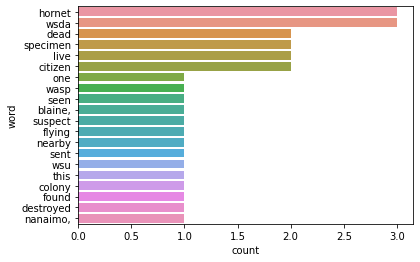

In [9]:
freq_words(remove_stopwords(positive_data['Notes']))

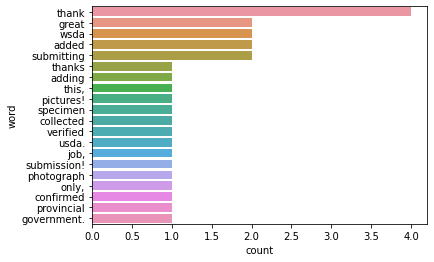

In [10]:
freq_words(remove_stopwords(positive_data['Lab Comments']))

## positive 样本评论词云图

(-0.5, 799.5, 799.5, -0.5)

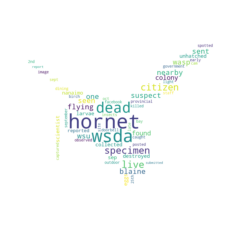

In [11]:
positive_data_notes = " ".join(remove_stopwords(positive_data['Notes']).tolist())
positive_mask = np.array(image.open("data/AGH.png"))
positive_notes_wordcloud = WordCloud(mask=positive_mask, 
                                     background_color='#FFFFFF', 
                                     repeat=False).generate(positive_data_notes)
positive_notes_wordcloud.to_file("data/wordcloud_images/positive_notes_wordcloud.png")
plt.imshow(positive_notes_wordcloud, interpolation='bilinear')
plt.axis("off") # 去掉坐标轴

(-0.5, 799.5, 799.5, -0.5)

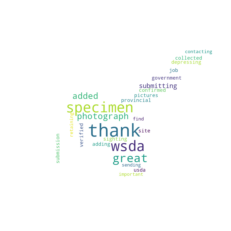

In [12]:
positive_data_comments = " ".join(remove_stopwords(positive_data['Lab Comments']).tolist())
positive_mask = np.array(image.open("data/AGH.png"))
positive_comments_wordcloud = WordCloud(mask=positive_mask, 
                                        background_color='#FFFFFF', 
                                        repeat=False).generate(positive_data_comments)
positive_comments_wordcloud.to_file("data/wordcloud_images/positive_comments_wordcloud.png")
plt.imshow(positive_comments_wordcloud, interpolation='bilinear')
plt.axis("off") # 去掉坐标轴

## 使用 TextRank 算法构建 positive 和 negative 样本的 Notes 和 Lab Comments 词典

In [19]:
from utils.TF_IDF import tf_idf

### positive notes

In [37]:
positive_notes = ' '.join(remove_stopwords(positive_data['Notes']).tolist())
print(positive_notes)

print('\nTF-IDF:')
positive_notes_tf_idf = tf_idf(remove_stopwords(positive_data['Notes']).tolist())
print(positive_notes_tf_idf)

print('\nTextRank:')
positive_notes_textrank = dict(keywords.keywords(positive_notes, scores=True))
print(positive_notes_textrank)

one dead wasp seen blaine, suspect flying nearby hornet specimen sent wsu this colony found destroyed nanaimo, sep 18, 2019. there ~150 live hornets ~600 unhatched eggs larvae   specimen collected citizen scientist reported provincial government.  insects observed late sept early oct spotted outdoor dining birch bay, posted wsda facebook site caught killed 2nd september 25th doorbell cam image dead hornet light live hornet captured wsda staff wsda submitted citizen report

TF-IDF:
{'one': 0.16494, 'wasp': 0.16494, 'seen': 0.16494, 'blain': 0.16494, 'suspect': 0.16494, 'sent': 0.32988, 'wsu': 0.32988, 'specimen': 0.12567, 'hornet': 0.10556, 'coloni': 0.09425, 'found': 0.09425, 'destroy': 0.09425, 'nanaimo': 0.09425, 'sep': 0.09425, 'collect': 0.1885, 'scientist': 0.1885, 'provinci': 0.1885, 'govern': 0.1885, 'insect': 0.21992, 'observ': 0.21992, 'late': 0.21992, 'sept': 0.21992, 'earli': 0.21992, 'spot': 0.14661, 'outdoor': 0.14661, 'dine': 0.14661, 'birch': 0.14661, 'bay': 0.14661, 'ca

In [38]:
positive_notes_textrank['wsu'] = positive_notes_tf_idf['wsu']
positive_notes_textrank['wasp'] = positive_notes_tf_idf['wasp']
positive_notes_textrank['scientist'] = positive_notes_tf_idf['scientist']
positive_notes_textrank['nanaimo'] = positive_notes_tf_idf['nanaimo']
positive_notes_textrank['outdoor'] = positive_notes_tf_idf['outdoor']
positive_notes_textrank['spot'] = positive_notes_tf_idf['spot']
positive_notes_textrank['kill'] = positive_notes_tf_idf['kill']

In [39]:
print(positive_notes_textrank)

{'hornets': 0.3421107752182008, 'hornet specimen': 0.27596228944242457, 'wsda': 0.2685600127418249, 'citizen': 0.20325251224124694, 'nanaimo': 0.09425, 'dead': 0.16270419048969365, 'reported': 0.15945952104809902, 'report': 0.15945952104809902, 'early oct spotted': 0.13243161978919019, 'wsu': 0.32988, 'wasp': 0.16494, 'scientist': 0.1885, 'outdoor': 0.14661, 'spot': 0.14661, 'kill': 0.26391}


In [44]:
with open('./data/dictionary/positive_notes_dictionary.txt', 'w') as file:
    file.write(str(positive_notes_textrank))

394

### positive lab comments

In [41]:
positive_comments = ' '.join(remove_stopwords(positive_data['Lab Comments']).tolist())
print(positive_comments)

print('\nTF-IDF:')
positive_comments_tf_idf = tf_idf(remove_stopwords(positive_data['Lab Comments']).tolist())
print(positive_comments_tf_idf)

print('\nTextRank:')
positive_comments_textrank = dict(keywords.keywords(positive_comments, scores=True))
print(positive_comments_textrank)

  thanks adding this, great pictures! specimen collected verified wsda usda. great job, thank submission! photograph only, confirmed provincial government. site added wsda. added wsda thank submitting depressing sighting! thank contacting photographs, sending specimens!  thank submitting important find, retaining specimens.    

TF-IDF:
{'pictur': 0.32988, 'great': 0.21992, 'ad': 0.32988, 'thank': 0.08797, 'collect': 0.14661, 'verifi': 0.14661, 'usda': 0.14661, 'job': 0.14661, 'submiss': 0.14661, 'confirm': 0.1885, 'provinci': 0.1885, 'govern': 0.1885, 'site': 0.1885, 'photograph': 0.17594, 'wsda': 0.32988, 'depress': 0.32988, 'sight': 0.32988, 'submit': 0.14661, 'contact': 0.26391, 'send': 0.26391, 'specimen': 0.10996, 'import': 0.21992, 'find': 0.21992, 'retain': 0.21992}

TextRank:
{'thanks': 0.5153349387254322, 'thank': 0.5153349387254322, 'specimen': 0.34668658363919985, 'specimens': 0.34668658363919985, 'wsda': 0.26840069810083705, 'submitting': 0.2286630259061381}


In [42]:
positive_comments_textrank.pop('thanks')
positive_comments_textrank.pop('thank')
positive_comments_textrank['usda'] = positive_comments_tf_idf['usda']
positive_comments_textrank['confirm'] = positive_comments_tf_idf['confirm']

0.5153349387254322

0.5153349387254322

In [43]:
print(positive_comments_textrank)

{'specimen': 0.34668658363919985, 'specimens': 0.34668658363919985, 'wsda': 0.26840069810083705, 'submitting': 0.2286630259061381, 'usda': 0.14661, 'confirm': 0.1885}


In [46]:
with open('./data/dictionary/positive_comments_dictionary.txt', 'w') as file:
    file.write(str(positive_comments_textrank))

166

## 选取 negative 样本

In [49]:
negative_data = data[data['Lab Status'] == 'Negative ID']
negative_data.head()
negative_data.info()

,GlobalID,Detection Date,Notes,Lab Status,Lab Comments,Submission Date,Latitude,Longitude,FileName
6,{C4F44511-EA53-4FCF-9422-E1C57703720D},2020-02-29,"I’m not sure what this is, but it was the bigg...",Negative ID,This is a large fly that mimics bees! Thanks f...,2020-02-29,48.729596,-122.480035,ATT9.png
8,{89C867F1-D5ED-48C8-9586-B705F5DA9838},2019-09-07,"slow moving, i have this in the freezer still ...",Negative ID,Thank you for this submission. This is a harml...,2020-03-18,47.395721,-123.105188,ATT11.png
9,{81670D96-4143-47B1-A9C8-83977892D53F},2020-03-19,It landed on my window while working. It walke...,Negative ID,Hello! This one is a Yellowjacket:,2020-03-19,47.840041,-122.323562,ATT15.png
12,{D30895B7-3994-45A3-BD51-E5BA881833FD},2019-08-30,Probably not an Asain Hornet but still a prett...,Negative ID,"Hello! This is a native wood-boring wasp, in t...",2020-03-19,47.635058,-122.057332,ATT16.png
14,{1304CF55-4FF9-490F-AF5A-5719CD110A9D},2020-03-23,Was on the garden hose. It stung (maybe just a...,Negative ID,"This sounds more like a yellowjacket, which ar...",2020-03-24,48.743610,-122.439050,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 6 to 4353
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GlobalID         2055 non-null   object 
 1   Detection Date   2055 non-null   object 
 2   Notes            2055 non-null   object 
 3   Lab Status       2055 non-null   object 
 4   Lab Comments     2055 non-null   object 
 5   Submission Date  2055 non-null   object 
 6   Latitude         2055 non-null   float64
 7   Longitude        2055 non-null   float64
 8   FileName         2030 non-null   object 
dtypes: float64(2), object(7)
memory usage: 160.5+ KB


## 去除停用词后进行词频统计

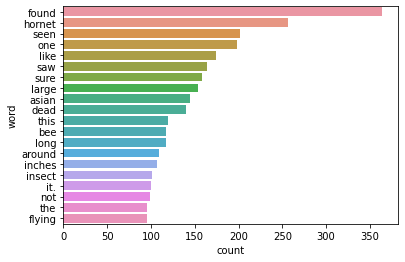

In [50]:
freq_words(remove_stopwords(negative_data['Notes']))

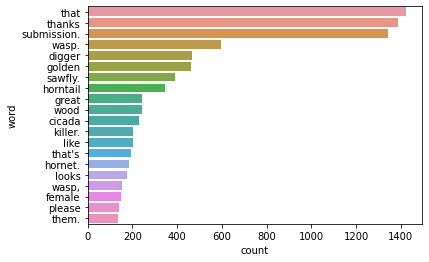

In [51]:
freq_words(remove_stopwords(negative_data['Lab Comments']))

## negative 样本评论词云图

(-0.5, 799.5, 799.5, -0.5)

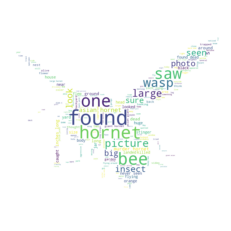

In [52]:
negative_data_notes = " ".join(remove_stopwords(negative_data['Notes']).tolist())
negative_mask = np.array(image.open("data/AGH.png"))
negative_notes_wordcloud = WordCloud(mask=negative_mask, 
                                     background_color='#FFFFFF', 
                                     repeat=False).generate(negative_data_notes)
negative_notes_wordcloud.to_file("data/wordcloud_images/negative_notes_wordcloud.png")
plt.imshow(negative_notes_wordcloud, interpolation='bilinear')
plt.axis("off") # 去掉坐标轴

(-0.5, 799.5, 799.5, -0.5)

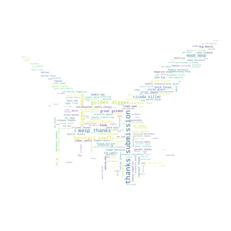

In [53]:
negative_data_comments = " ".join(remove_stopwords(negative_data['Lab Comments']).tolist())
negative_mask = np.array(image.open("data/AGH.png"))
negative_comments_wordcloud = WordCloud(mask=negative_mask, 
                                        background_color='#FFFFFF', 
                                        repeat=False).generate(negative_data_comments)
negative_comments_wordcloud.to_file("data/wordcloud_images/negative_comments_wordcloud.png")
plt.imshow(negative_comments_wordcloud, interpolation='bilinear')
plt.axis("off") # 去掉坐标轴

### negative notes

In [56]:
negative_notes = ' '.join(remove_stopwords(negative_data['Notes']).tolist())
# print(negative_notes)

print('\nTextRank:')
negative_notes_textrank = dict(keywords.keywords(negative_notes, scores=True))
print(negative_notes_textrank)


TextRank:
{'hornet': 0.28213452621625984, 'hornets': 0.28213452621625984, 'look': 0.18008614820929622, 'looked': 0.18008614820929622, 'bees wasps': 0.16613156557008907, 'seen': 0.16612215359729127, 'pictures': 0.15622867959280523, 'pictured': 0.15622867959280523, 'largely': 0.15249238429637965, 'photo': 0.138659056145725, 'insects': 0.13862685016961107, 'likes': 0.13613942795439823, 'deadly': 0.128118458732227, 'think saw': 0.1267183453850031, 'flies': 0.12550861490306753, 'wasp': 0.12544726077147872, 'near': 0.12120696159741542, 'nearly': 0.12120696159741542, 'landing': 0.11686058295240785, 'kill': 0.11426035359224777, 'killed': 0.11426035359224777, 'killing': 0.11426035359224777, 'inch': 0.11101284070935405, 'inches': 0.11101284070935405, 'ground': 0.10977968437484492, 'yard': 0.10908296849315012, 'yards': 0.10908296849315012, 'house': 0.10657873590038378, 'houses': 0.10657873590038378, 'tried fly': 0.10464526202654965, 'sure': 0.1020855774931877, 'huge bee buzzing': 0.1014738176028

In [62]:
print(len(negative_notes_textrank))

673


In [63]:
with open('./data/dictionary/negative_notes_dictionary.txt', 'w') as file:
    file.write(str(negative_notes_textrank))

21879

### negative lab comments

In [67]:
negative_comments = ' '.join(remove_stopwords(negative_data['Lab Comments']).tolist())
# print(positive_comments)

print('\nTextRank:')
negative_comments_textrank = dict(keywords.keywords(negative_comments, scores=True))
print(negative_comments_textrank)


TextRank:
{'thank': 0.3973232318867209, 'like': 0.31711073409742185, 'likely': 0.31711073409742185, 'wasp': 0.30350867201872184, 'wasps': 0.30350867201872184, 'bees thanks': 0.27245297025484994, 'hornets': 0.19696666122397574, 'hornet': 0.19696666122397574, 'sawflies': 0.19204062367346733, 'beetle': 0.16374790255430413, 'beetles': 0.16374790255430413, 'bee': 0.147582708622979, 'look': 0.1470280308938437, 'looked': 0.1470280308938437, 'flying': 0.14525938945960395, 'flies': 0.14525938945960395, 'great': 0.12952184355672391, 'insect': 0.1291571728152105, 'insects': 0.1291571728152105, 'possibly': 0.12824355156220182, 'sawfly cimbex': 0.12086307069116989, 'cicadas': 0.11719188839792581, 'colored': 0.11585365302670445, 'coloring': 0.11585365302670445, 'colors': 0.11585365302670445, 'color': 0.11585365302670445, 'wood': 0.10850812356618081, 'woods': 0.10850812356618081, 'harmless native golden': 0.10722664402803228, 'yellowjacket': 0.10475543697156653, 'yellowjackets': 0.10475543697156653,

In [68]:
negative_comments_textrank.pop('thank')
print(len(negative_comments_textrank))

0.3973232318867209

140


In [69]:
with open('./data/dictionary/negative_comments_dictionary.txt', 'w') as file:
    file.write(str(negative_comments_textrank))

4507